In [1]:
import pandas as pd
import numpy  as np
import os
import re

1. count of inds should be similar to what we have in monolingual.json and cross lingual jsom
1a. keys should be matched one to one no sample should be left
2. less than 10 retrieved results per sample

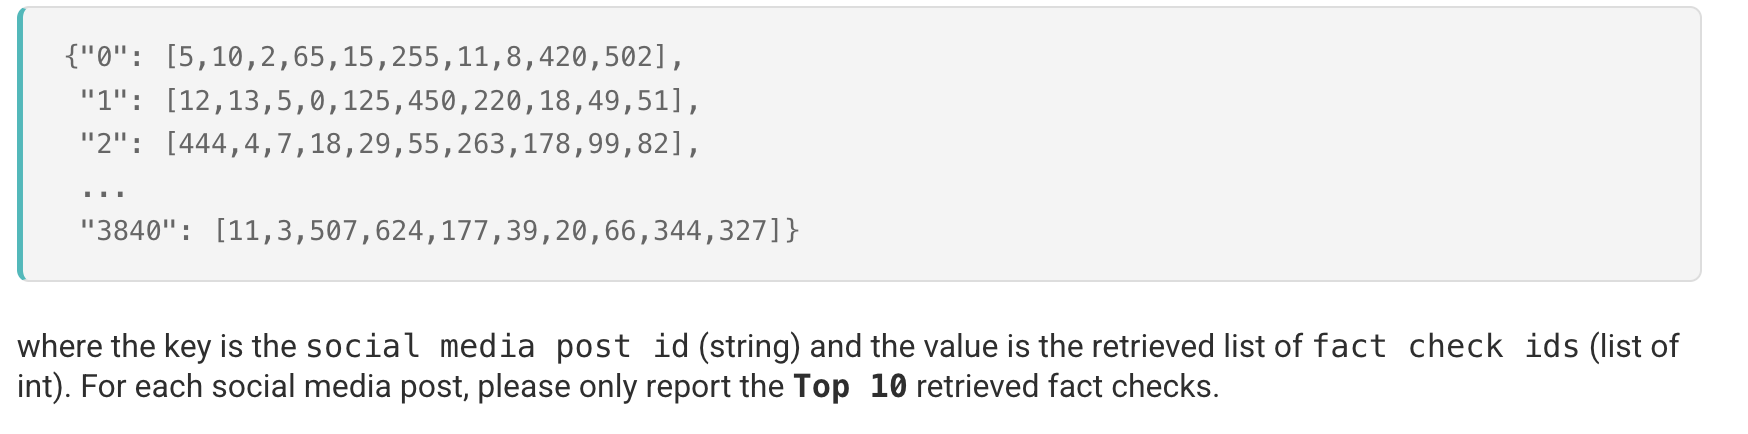

In [2]:
deu_lang = pd.read_csv('/kaggle/input/semeval-data/bi_encoder_preds/me5_large_lang/dev_deu.csv')
fra_lang = pd.read_csv('/kaggle/input/semeval-data/bi_encoder_preds/me5_large_lang/dev_fra.csv')
eng_lang = pd.read_csv('/kaggle/input/semeval-data/bi_encoder_preds/me5_large_lang/dev_eng.csv')
msa_lang = pd.read_csv('/kaggle/input/semeval-data/bi_encoder_preds/me5_large_lang/dev_msa.csv')
tha_lang = pd.read_csv('/kaggle/input/semeval-data/bi_encoder_preds/me5_large_lang/dev_tha.csv')
tur_lang = pd.read_csv('/kaggle/input/semeval-data/bi_encoder_preds/me5_large_lang/dev_tur.csv')
spa_lang = pd.read_csv('/kaggle/input/semeval-data/bi_encoder_preds/me5_large_lang/dev_spa.csv')
ara_lang = pd.read_csv('/kaggle/input/semeval-data/bi_encoder_preds/me5_large_lang/dev_ara.csv')
pol_lang = pd.read_csv('/kaggle/input/semeval-data/bi_encoder_preds/me5_large_lang/dev_pol.csv')
por_lang = pd.read_csv('/kaggle/input/semeval-data/bi_encoder_preds/me5_large_lang/dev_por.csv')

# Add a language column for tracking
deu_lang["language"] = "deu"
fra_lang["language"] = "fra"
eng_lang["language"] = "eng"
por_lang["language"] = "por"

msa_lang["language"] = "msa"
tha_lang["language"] = "tha"
tur_lang["language"] = "tur"

spa_lang["language"] = "spa"
ara_lang["language"] = "ara"
pol_lang["language"] = "pol"

# Concatenate all DataFrames
monolingual_model_outs = pd.concat(
    [deu_lang, fra_lang, eng_lang, msa_lang, tha_lang, tur_lang, spa_lang, ara_lang, pol_lang, por_lang], 
    ignore_index=True
)

monolingual_model_outs = monolingual_model_outs.sort_values(by = ['post_id']).reset_index(drop = True)
monolingual_model_outs = monolingual_model_outs.drop(columns = ['language'])
monolingual_model_outs.columns = ['post_id', 'pred_ids']

In [3]:
monolingual_model_outs['pred_ids'] = monolingual_model_outs['pred_ids'].apply(lambda x: list(map(int, re.findall(r'\d+', x))))

In [4]:
monolingual_model_outs

,post_id,pred_ids
0,28094,"[301656, 120496, 48622, 88946, 147907, 46454, ..."
1,28095,"[290675, 307573, 278170, 232162, 276868, 30779..."
2,28102,"[272272, 290302, 347395, 14585, 92250, 122998,..."
3,28112,"[47372, 47355, 286588, 117255, 1511, 325752, 1..."
4,28150,"[239592, 241289, 310376, 59704, 61929, 43658, ..."
...,...,...
4271,79490,"[358334, 355886, 173210, 176055, 165740, 16734..."
4272,79492,"[358335, 314426, 351045, 352649, 351600, 31446..."
4273,79493,"[358952, 310887, 260851, 289159, 307897, 20896..."
4274,79494,"[360265, 52959, 27252, 86945, 349909, 61365, 3..."


In [5]:
monolingual_preds_skel_list = pd.read_json('/kaggle/input/semeval-data/SemEval_Task7_Test_Phase/monolingual_predictions.json').T.reset_index()
monolingual_preds_skel_list = monolingual_preds_skel_list['index'].values

In [6]:
missing_values = [pid for pid in monolingual_preds_skel_list if pid not in monolingual_model_outs["post_id"].values]

if missing_values:
    print(f"Missing values count: {len(missing_values)}")
    print("Sample missing values:", missing_values)  # Show first 10 missing values
else:
    print("All values in monolingual_preds_skel_list are present in monolingual_model_outs ['post_id'].")

All values in monolingual_preds_skel_list are present in monolingual_model_outs ['post_id'].


In [7]:
monolingual_model_outs = monolingual_model_outs.set_index('post_id')

monolingual_model_outs_json = monolingual_model_outs["pred_ids"].to_dict()

# Ensure keys are strings
monolingual_model_outs_json = {str(k): v[:10] for k, v in monolingual_model_outs_json.items()}

In [8]:
import json

# Print sample key and value types
sample_key = next(iter(monolingual_model_outs_json.keys()))
sample_value = monolingual_model_outs_json[sample_key]

print(f"Sample key: {sample_key}, Type: {type(sample_key)}")
print(f"Sample value: {sample_value}, Type: {type(sample_value)}")
print(f"Type of elements in value list: {[type(v) for v in sample_value]}")

with open("monolingual_predictions.json", "w") as f:
    json.dump(monolingual_model_outs_json, f, indent=4)

Sample key: 28094, Type: <class 'str'>
Sample value: [301656, 120496, 48622, 88946, 147907, 46454, 48579, 75308, 136260, 91421], Type: <class 'list'>
Type of elements in value list: [<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]


In [9]:
cross_preds = pd.read_csv('/kaggle/input/semeval-data/bi_encoder_preds/me5_large_lang/me5_dev_cross.csv')

crosslingual_preds_skel_list = pd.read_json('/kaggle/input/semeval-data/SemEval_Task7_Test_Phase/crosslingual_predictions.json').T.reset_index()
crosslingual_preds_skel_list = crosslingual_preds_skel_list['index'].values

cross_preds = cross_preds.sort_values(by = ['post_id']).reset_index(drop = True)
cross_preds.columns = ['post_id', 'pred_ids']

In [10]:
cross_preds['pred_ids'] = cross_preds['pred_ids'].apply(lambda x: list(map(int, re.findall(r'\d+', x))))

In [11]:
missing_values = [pid for pid in crosslingual_preds_skel_list if pid not in cross_preds["post_id"].values]

if missing_values:
    print(f"Missing values count: {len(missing_values)}")
    print("Sample missing values:", missing_values)  # Show first 10 missing values
else:
    print("All values in crosslingual_preds_skel_list are present in cross_preds ['post_id'].")

All values in crosslingual_preds_skel_list are present in cross_preds ['post_id'].


In [12]:
cross_preds

,post_id,pred_ids
0,28101,"[296866, 348990, 236174, 289841, 232391, 24208..."
1,28136,"[182574, 178027, 102365, 178028, 142031, 14405..."
2,28142,"[155292, 78034, 92619, 103964, 126438, 314961,..."
3,28147,"[144623, 144641, 141542, 138886, 142395, 11272..."
4,28149,"[38101, 20407, 87094, 149521, 149577, 132036, ..."
...,...,...
3995,79391,"[32022, 334578, 288628, 265008, 268056, 337239..."
3996,79420,"[358036, 297232, 287737, 308398, 357918, 29573..."
3997,79425,"[357948, 355029, 247888, 270199, 106600, 26107..."
3998,79484,"[147797, 304503, 310953, 332393, 63656, 300796..."


In [13]:
cross_preds = cross_preds.set_index('post_id')

cross_preds_json = cross_preds["pred_ids"].to_dict()
# Ensure keys are strings
cross_preds_json = {str(k): v[:10] for k, v in cross_preds_json.items()}

In [14]:
import json

# Print sample key and value types
sample_key = next(iter(cross_preds_json.keys()))
sample_value = cross_preds_json[sample_key]

print(f"Sample key: {sample_key}, Type: {type(sample_key)}")
print(f"Sample value: {sample_value}, Type: {type(sample_value)}")
print(f"Type of elements in value list: {[type(v) for v in sample_value]}")

with open("crosslingual_predictions.json", "w") as f:
    json.dump(cross_preds_json, f, indent=4)

Sample key: 28101, Type: <class 'str'>
Sample value: [296866, 348990, 236174, 289841, 232391, 242083, 260952, 269336, 322888, 372491], Type: <class 'list'>
Type of elements in value list: [<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]
